# Week 14 Activity

HELP International is an international humanitarian NGO that is committed to 
fighting poverty and providing the people of backward countries with basic 
amenities and relief during the time of disasters and natural calamities. After 
the recent project that included a lot of awareness drives and funding 
programmes, they have been able to raise around $ 10 million. The significant 
issues that come while making this decision are mostly related to choosing the 
countries that are in the direst need of aid.
How will you help this NGO to make a correct decision based on socioeconomic and health factors?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.shape

(167, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
df = data.drop('country',axis=1)

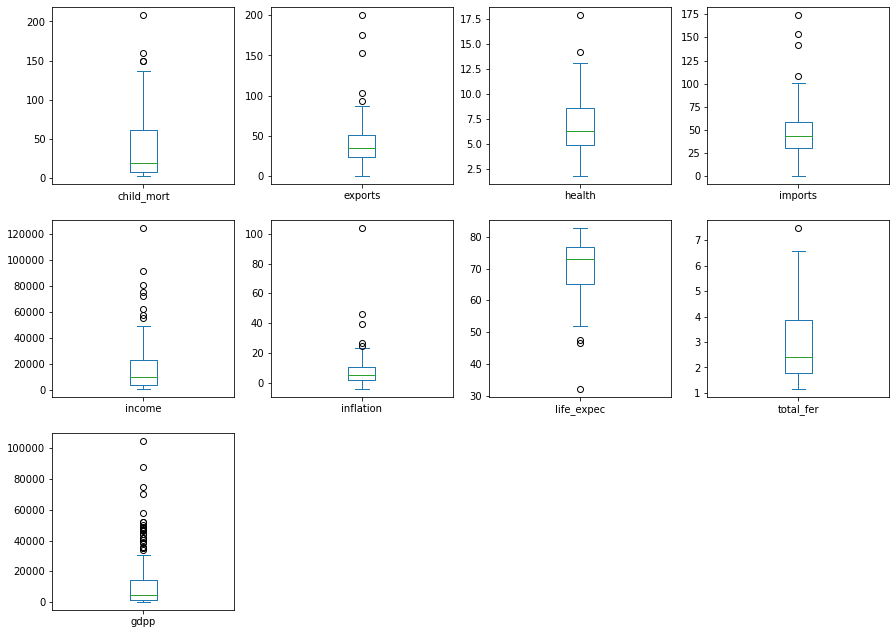

In [8]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

we can see that gdpp and income has high outliers.we cant remove outliers from inflation as it might lead to loss in country who may need aid

### handling outliers

In [9]:
#gdpp outlier handling
q1=np.percentile(df['gdpp'],25,interpolation='midpoint')
q2=np.percentile(df['gdpp'],50,interpolation='midpoint')
q3=np.percentile(df['gdpp'],75,interpolation='midpoint')
IQR=q3-q1
low_lim=q1-(1.5*IQR)
up_lim=q3+(1.5*IQR)
print('Lower limit : ',low_lim)
print('Upper limit : ',up_lim)
up=df['gdpp']>up_lim
low=df['gdpp']<low_lim
df.drop(df.loc[up].index,inplace=True)
df.drop(df.loc[low].index,inplace=True)

Lower limit :  -17750.0
Upper limit :  33130.0


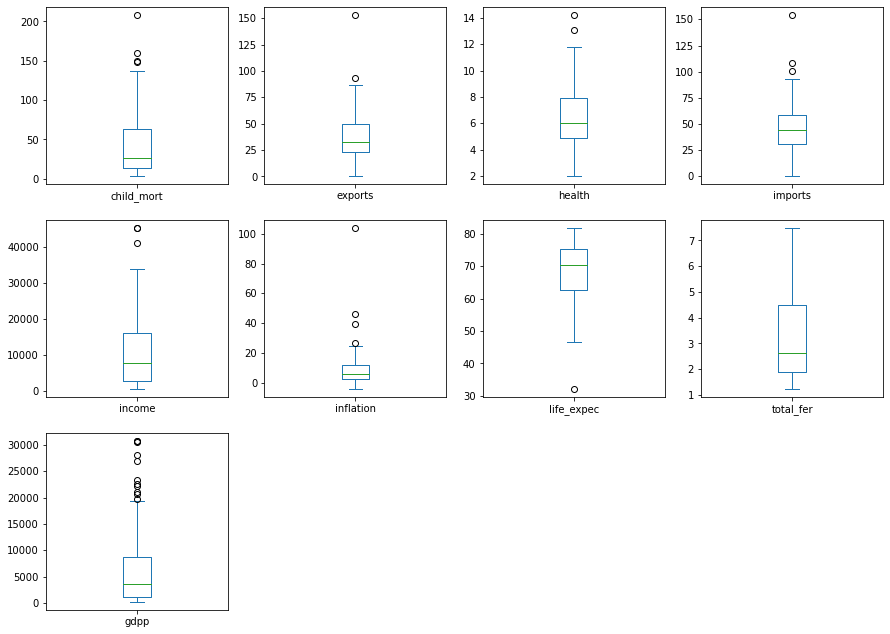

In [10]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

In [11]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,142.000000,142.000000,142.000000,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000
mean,44.112676,37.970415,6.424014,46.598351,10935.65493,8.599683,68.806338,3.149014,6340.943662
std,41.038923,21.839432,2.369044,21.142601,9895.15270,11.112812,8.490539,1.553241,7110.006849
min,3.200000,0.109000,1.970000,0.065900,609.00000,-4.210000,32.100000,1.230000,231.000000
25%,13.900000,22.800000,4.872500,31.325000,2715.00000,2.342500,62.825000,1.890000,1205.000000
50%,26.300000,33.050000,5.990000,44.100000,7940.00000,5.935000,70.450000,2.630000,3575.000000
75%,63.850000,50.200000,7.887500,58.825000,16150.00000,11.975000,75.475000,4.475000,8637.500000
max,208.000000,153.000000,14.200000,154.000000,45400.00000,104.000000,81.900000,7.490000,30800.000000


we can see that just by handling gdpp outliers most of the outliers are handled

In [12]:
df.shape

(142, 9)

<Figure size 288x288 with 0 Axes>

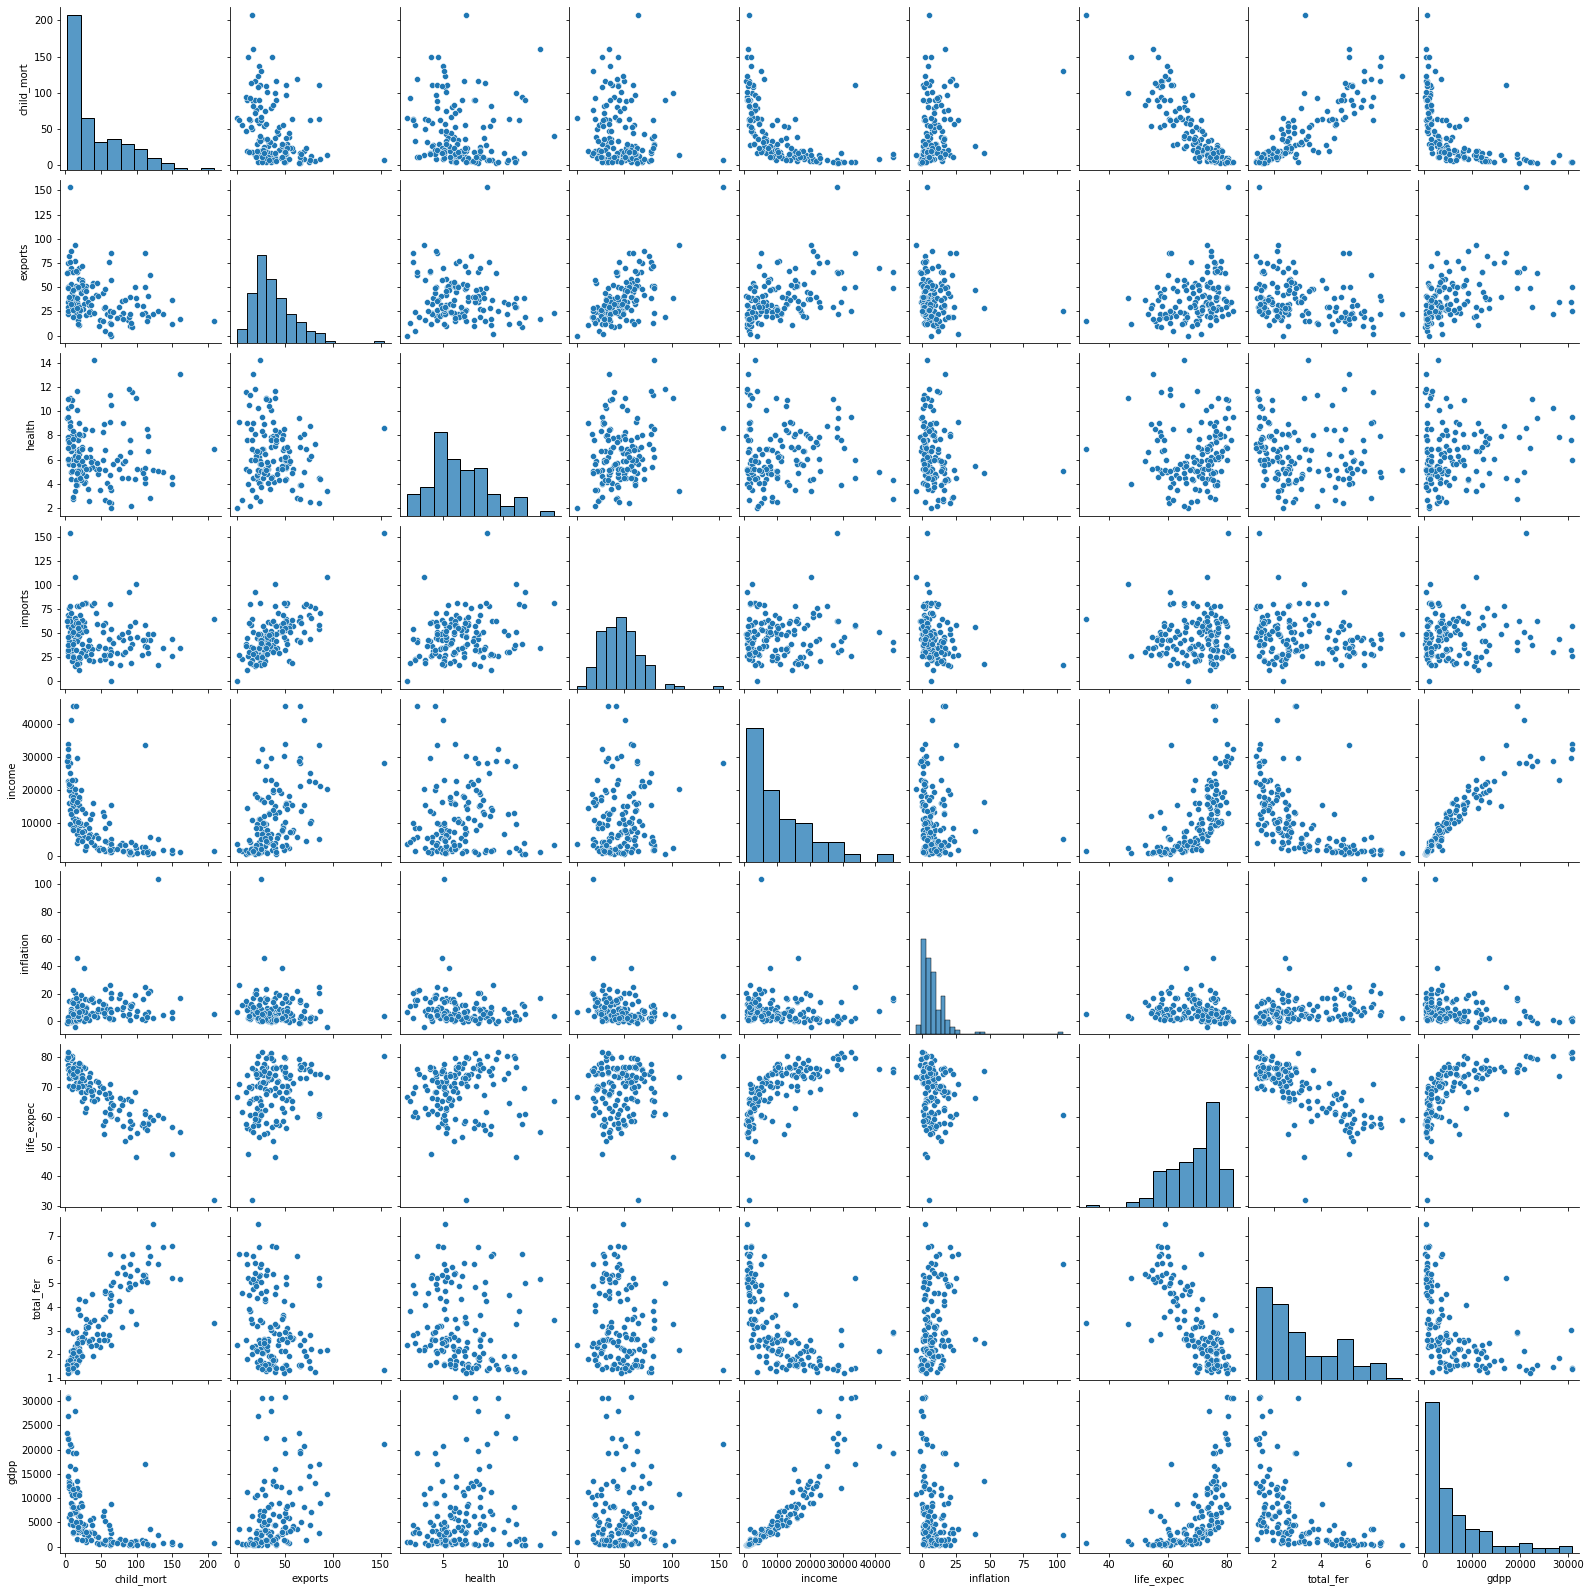

In [13]:
#visualising the data
plt.figure(figsize = (4,4))
sns.pairplot(df)
plt.show()

<AxesSubplot:>

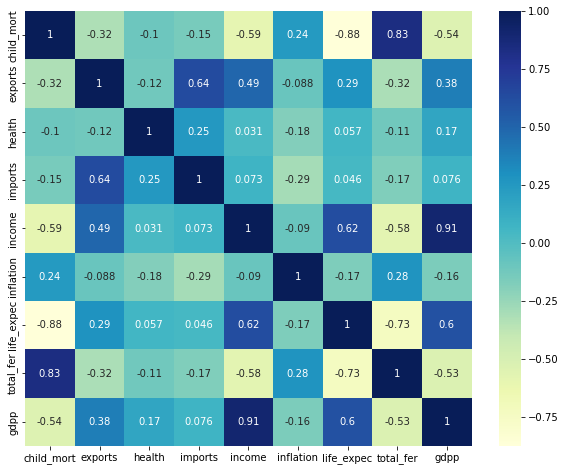

In [14]:
plt.figure(figsize = (10,8))  
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu")

We can see high correlation between total_fer and child_mort,
between gdpp and income,and
between imports and exports

In [15]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[df.columns]=scaler.fit_transform(df)
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02
mean,-7.974841e-17,-4.101766e-16,-2.449136e-16,4.229793e-16,1.219682e-16,-3.909236e-19,6.458058e-16,1.407325e-16,-1.563694e-18
std,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00
min,-1.000453e+00,-1.739763e+00,-1.886744e+00,-2.208677e+00,-1.047302e+00,-1.156775e+00,-4.338508e+00,-1.239864e+00,-8.623862e-01
25%,-7.388017e-01,-6.970931e-01,-6.572296e-01,-7.249541e-01,-8.337168e-01,-5.650534e-01,-7.069647e-01,-8.134418e-01,-7.249113e-01
50%,-4.355799e-01,-2.260971e-01,-1.838507e-01,-1.185850e-01,-3.038113e-01,-2.406336e-01,1.942727e-01,-3.353320e-01,-3.903983e-01
75%,4.826440e-01,5.619595e-01,6.199404e-01,5.803415e-01,5.288249e-01,3.048072e-01,7.882030e-01,8.567119e-01,3.241468e-01
max,4.007597e+00,5.285704e+00,3.293949e+00,5.097851e+00,3.495281e+00,8.615103e+00,1.547606e+00,2.804686e+00,3.452266e+00


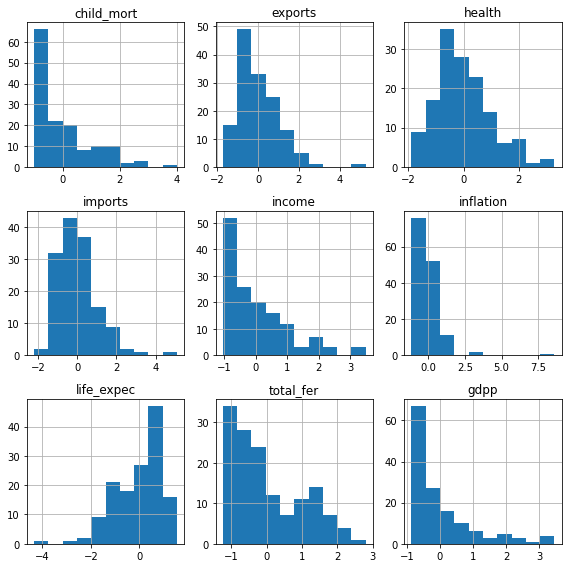

In [16]:
df.hist(figsize=(8,8))
plt.tight_layout()
plt.show()

### K-means Clustering

1278.0
883.0956984722064
722.823452682881
660.2483164219464
589.2201695394488
536.340294178184
492.2372074203714
447.47754255626376
412.29767565644096
386.8565801207701


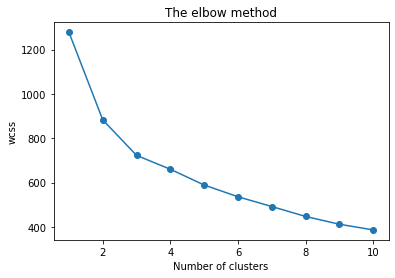

In [17]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init= 'k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss,'-o')
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

From the Elbow Method it is Clear that we have 3 Clusters

In [18]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df)
y_kmeans

array([2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 2])

In [19]:
df['clusters']=y_kmeans

In [20]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'clusters'],
      dtype='object')

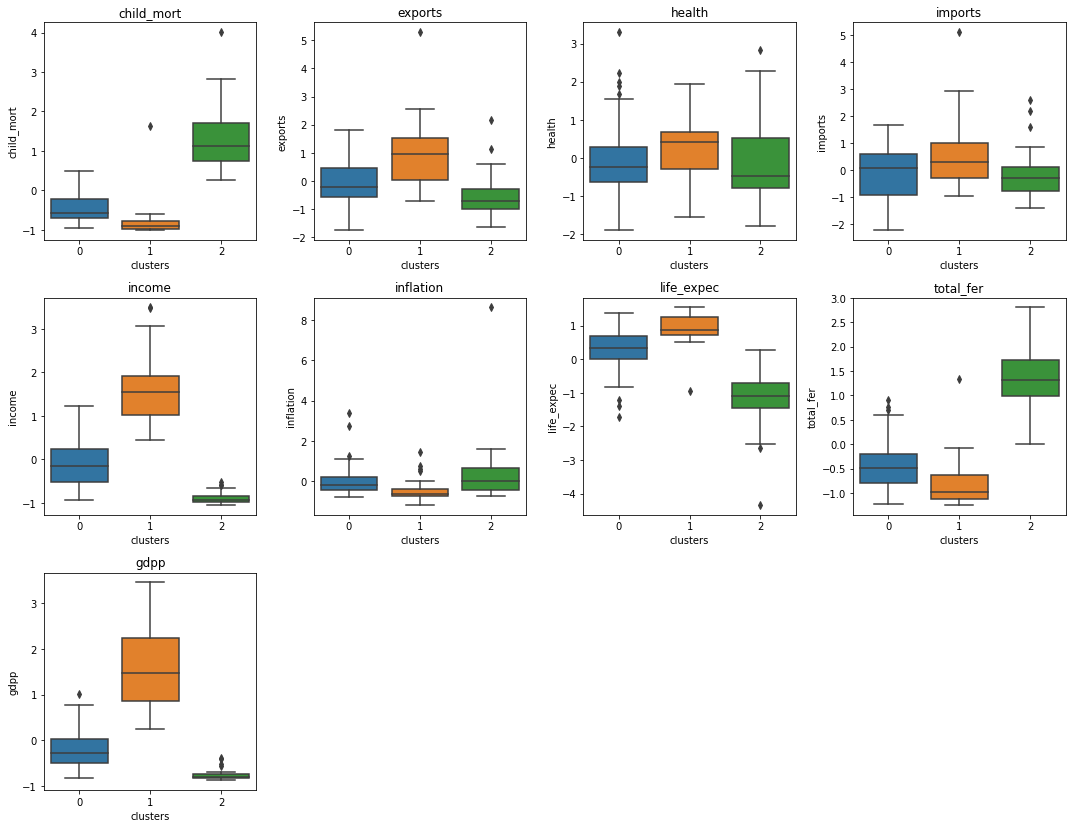

In [21]:
l=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(15,15))
for i in range(len(l)):
    plt.subplot(4,4,i+1)
    sns.boxplot(df.clusters,df[l[i]])
    plt.title(l[i])
    plt.tight_layout()

In [22]:
country=data['country']
new_df=pd.DataFrame({'clusters':df['clusters'],'country':country})
new_df

,clusters,country
0,2.0,Afghanistan
1,0.0,Albania
2,0.0,Algeria
3,2.0,Angola
4,1.0,Antigua and Barbuda
...,...,...
162,0.0,Vanuatu
163,0.0,Venezuela
164,0.0,Vietnam
165,2.0,Yemen


In [23]:
df.groupby('clusters').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
0,-0.430254,-0.073742,-0.064545,-0.081480,-0.115272,-0.010351,0.299272,-0.442424,-0.214244
1,-0.788058,0.995702,0.221751,0.505075,1.599502,-0.409726,0.909353,-0.769830,1.661493
2,1.304247,-0.548694,-0.036519,-0.199855,-0.887102,0.298244,-1.153872,1.313469,-0.753219


mean value for cluster 0 has poor indicators

In [24]:
df['clusters'].value_counts()

0    73
2    41
1    28
Name: clusters, dtype: int64

In [25]:
#countries that comes under cluster0
country_zero=list(new_df[new_df['clusters']==0].country)
country_zero

['Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'China',
 'Colombia',
 'Costa Rica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Fiji',
 'Gabon',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Lebanon',
 'Macedonia, FYR',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Paraguay',
 'Peru',
 'Philippines',
 'Romania',
 'Russia',
 'Samoa',
 'Serbia',
 'Solomon Islands',
 'South Africa',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Thailand',
 'Tonga',
 'Tunisia',
 'Turkey',
 'Turkmenistan',
 'Ukraine',
 'Uruguay',
 'Uzbekistan',
 'Vanuatu',
 'Venezuela',
 'Vietnam']

73 countries present in cluster 0 are in direct need of aid